<a href="https://colab.research.google.com/github/AlbinBahtiri/Data-Science-Projects/blob/main/Analysis_of_Ecommerce_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
df = pd.read_csv('//content//ecommerce_sales_analysis.csv')

In [33]:
print(df.head())

   product_id product_name        category   price  review_score  \
0           1    Product_1        Clothing  190.40           1.7   
1           2    Product_2  Home & Kitchen  475.60           3.2   
2           3    Product_3            Toys  367.34           4.5   
3           4    Product_4            Toys  301.34           3.9   
4           5    Product_5           Books   82.23           4.2   

   review_count  sales_month_1  sales_month_2  sales_month_3  sales_month_4  \
0           220            479            449             92            784   
1           903             21            989            861            863   
2           163            348            558            567            143   
3           951            725            678             59             15   
4           220            682            451            649            301   

   sales_month_5  sales_month_6  sales_month_7  sales_month_8  sales_month_9  \
0            604            904     

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [60]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
price,0
review_score,0
review_count,0
sales_month_1,0
sales_month_2,0
sales_month_3,0
sales_month_4,0


In [61]:
df.describe()

,product_id,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,247.677130,3.027600,526.506000,498.306000,507.661000,506.739000,503.823000,487.194000,491.653000,507.011000,504.569000,491.934000,514.798000,505.83800,500.386000,6019.912000
std,288.819436,144.607983,1.171243,282.269932,289.941478,285.992689,294.010873,286.645567,287.844324,289.234018,291.047287,289.945691,287.514731,288.710119,288.82451,278.509459,992.273787
min,1.000000,7.290000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.00000,4.000000,2972.000000
25%,250.750000,121.810000,2.000000,283.750000,245.500000,262.500000,243.750000,261.500000,221.000000,236.000000,254.000000,240.500000,247.250000,267.000000,251.25000,259.000000,5392.000000
50%,500.500000,250.920000,3.100000,543.000000,507.500000,508.000000,493.000000,501.500000,497.000000,479.500000,522.500000,499.500000,495.500000,532.000000,502.00000,500.500000,5992.000000
75%,750.250000,373.435000,4.000000,772.000000,740.750000,756.250000,777.250000,749.500000,727.000000,740.500000,757.250000,762.250000,735.250000,770.250000,761.00000,730.000000,6680.000000
max,1000.000000,499.860000,5.000000,999.000000,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,9151.000000


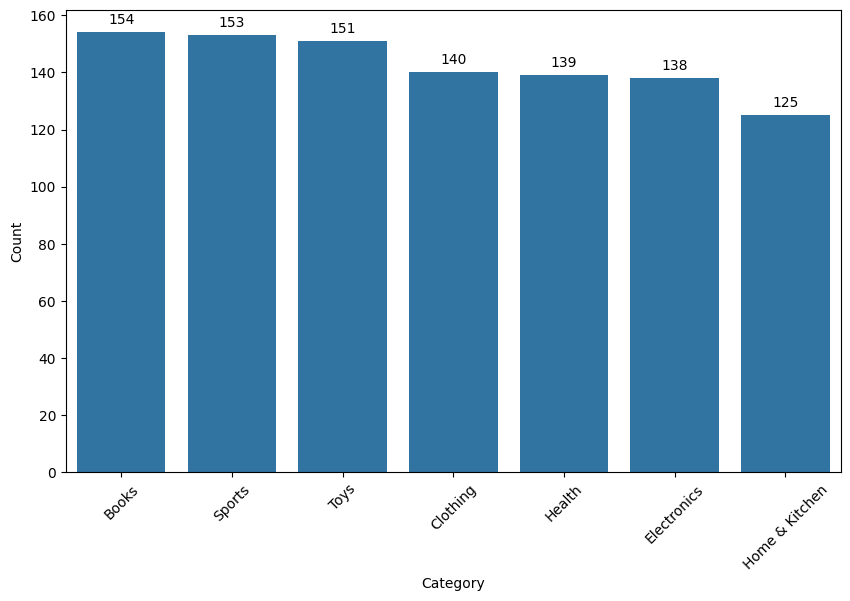

In [71]:
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'Count']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='category', y='Count', data=category_counts)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title=('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [36]:
print(f"Minimum price: ${df['price'].min()}")
print(f"Maximum price: ${df['price'].max()}")
print(f"Average price: ${df['price'].mean():.2f}")

Minimum price: $7.29
Maximum price: $499.86
Average price: $247.68


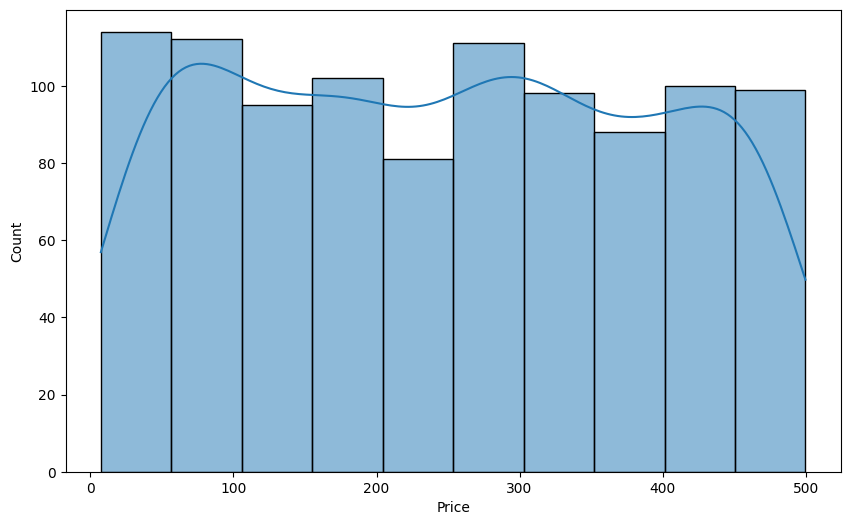

In [65]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'],bins=10,kde=True)
plt.title=('Price Distribution')
plt.xlabel('Price')
plt.show()
#we are visualizing the distribution of the 'price' column from the dataset using a histogram with 20 bins and a Kernel Density Estimate

In [38]:

print(f"Average review score: {df['review_score'].mean():.2f}")
print(f"Highest rated product: {df.loc[df['review_score'].idxmax(), 'product_name']} ({df['review_score'].max()})")
print(f"Lowest rated product: {df.loc[df['review_score'].idxmin(), 'product_name']} ({df['review_score'].min()})")
print(f"Average review count: {df['review_count'].mean():.0f}")


Average review score: 3.03
Highest rated product: Product_12 (5.0)
Lowest rated product: Product_169 (1.0)
Average review count: 527


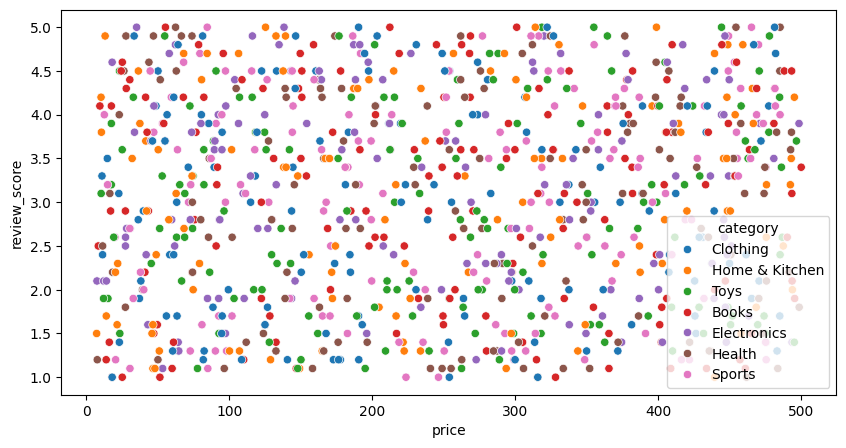

In [74]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='price', y='review_score', hue='category')
plt.title=('Price vs Review Score')
plt.show()

In [41]:

sales_columns = [col for col in df.columns if col.startswith('sales_month_')]
monthly_sales = df[sales_columns].sum()
print(monthly_sales)

sales_month_1     498306
sales_month_2     507661
sales_month_3     506739
sales_month_4     503823
sales_month_5     487194
sales_month_6     491653
sales_month_7     507011
sales_month_8     504569
sales_month_9     491934
sales_month_10    514798
sales_month_11    505838
sales_month_12    500386
dtype: int64


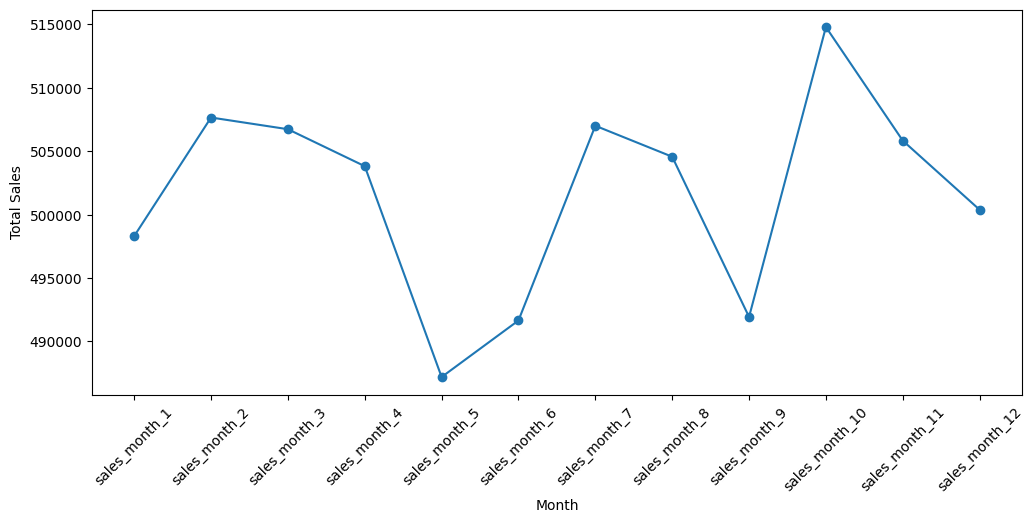

In [45]:
plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o')
plt.title=('Total Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(len(monthly_sales)), monthly_sales.index, rotation=45)
plt.show()

In [46]:

print(f"Highest sales month: Month {monthly_sales.idxmax().split('_')[-1]} with {monthly_sales.max()} sales")
print(f"Lowest sales month: Month {monthly_sales.idxmin().split('_')[-1]} with {monthly_sales.min()} sales")


Highest sales month: Month 10 with 514798 sales
Lowest sales month: Month 5 with 487194 sales


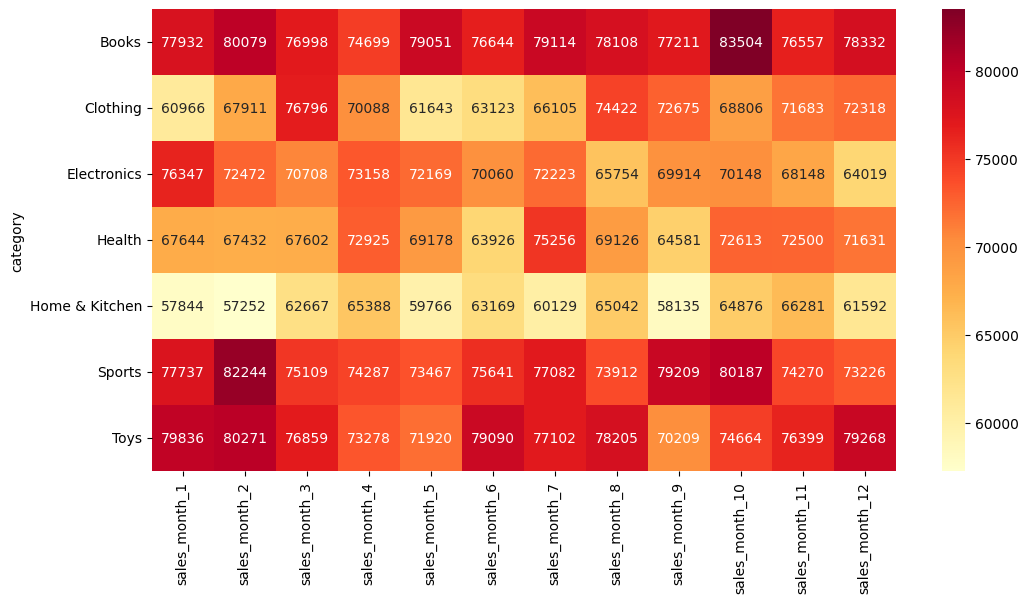

In [48]:
category_sales = df.groupby('category')[sales_columns].sum()
plt.figure(figsize=(12, 6))
sns.heatmap(category_sales, cmap='YlOrRd', annot=True, fmt='g')
plt.title=('Category Sales Performance by Month')
plt.show()

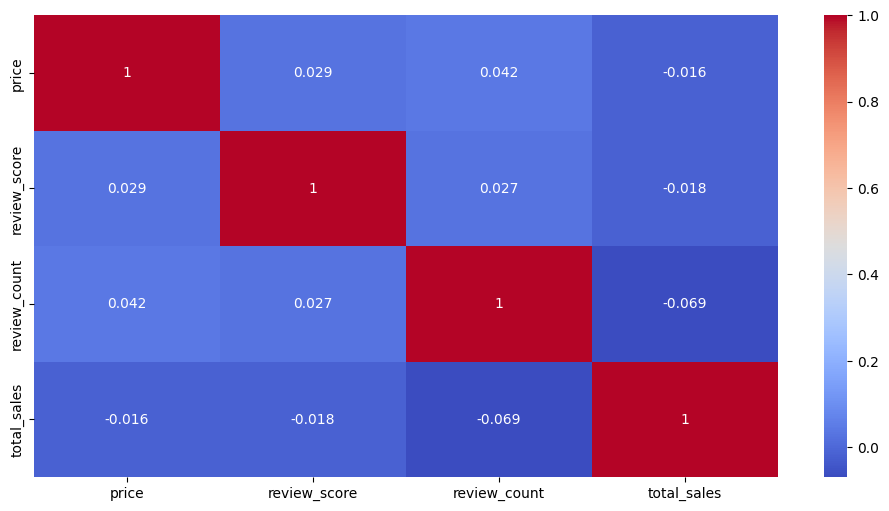

In [53]:
correlation_matrix = df[['price', 'review_score', 'review_count', 'total_sales']].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title=('Correlation Matrix')
plt.show()

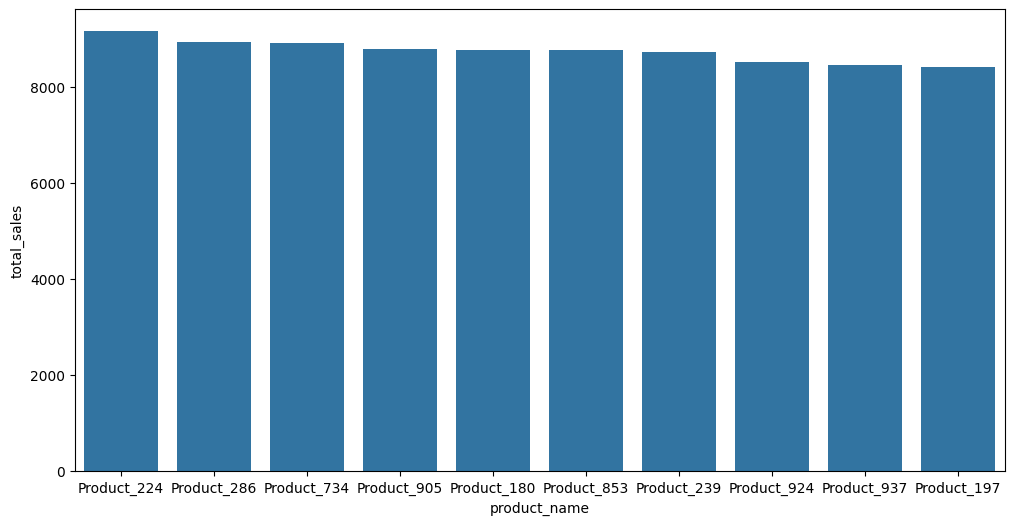

In [59]:
top_10_products = df.nlargest(10, 'total_sales')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_products, x='product_name', y='total_sales')
plt.title=('Top 10 Best Selling Products')
plt.xticks(rotation=0)
plt.show()